# Finding Heavy Traffic Indicators on I-94

The purpose of this project is to analyze a dataset about the westbound traffic on the I-94 Interstate highway. The main goal of this anaysis is to figure out some of the causes of heavy traffic on I-94. 

## Opening the Dataset 

In [1]:
import pandas as pd
mitv = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
mitv.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
mitv.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
mitv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume
The dataset documnetation stated that the station that recorded the traffic data was located midway between Minneapolis and Saint Paul. It also mentioned that the station only recorded westbound traffic

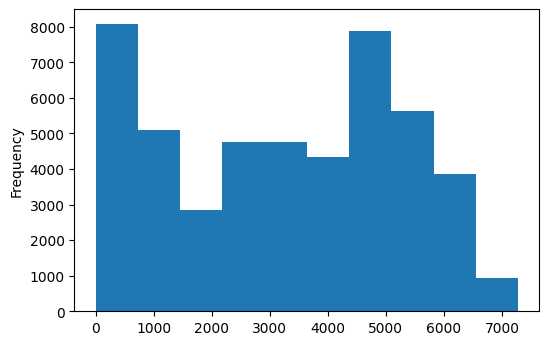

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

mitv['traffic_volume'].plot.hist()
plt.show()

mitv['traffic_volume'].describe()

__Observations__
- The highest volume of cars was 7280
- 25% of the time 1193 cars or lower were passing, this was probably at night
- The median of cars passing is 3380
- 25% of the time 4933 cars or more were passing, this was probably during the day 

## Traffic Volume: Day vs. Night
Splitting the data into daytime data and nighttime data
- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [5]:
mitv['date_time'] = pd.to_datetime(mitv['date_time'])
daytime = mitv[(mitv['date_time'].dt.hour >= 7) & (mitv['date_time'].dt.hour < 19)]
nighttime = mitv[(mitv['date_time'].dt.hour >=19) | (mitv['date_time'].dt.hour < 7)]
print(daytime.shape)
print(nighttime.shape)

(23877, 9)
(24327, 9)


As seen the nighttime dataset has more rows, this is due to a couple of rows missing data for the daytime hours.

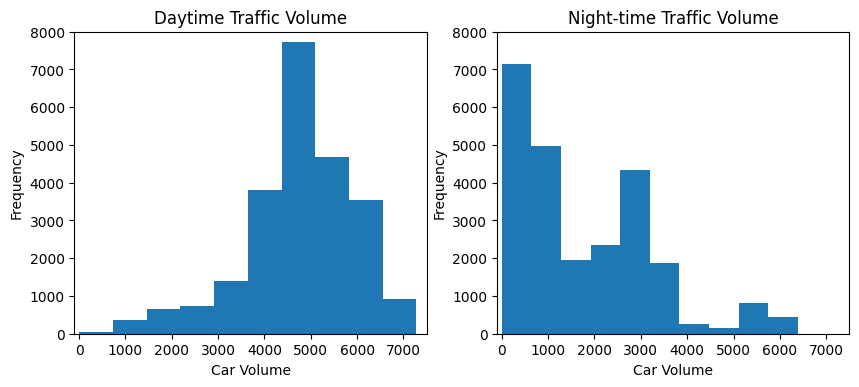

In [6]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)

plt.hist(daytime['traffic_volume'])
plt.title('Daytime Traffic Volume')
plt.xlabel('Car Volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(-100,7500)

plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'])
plt.title('Night-time Traffic Volume')
plt.xlabel('Car Volume')
plt.ylabel('Frequency')
plt.ylim(0,8000)
plt.xlim(-100,7500)
plt.show()

In [7]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

__Analysis__
- The daytime histograph is right skewed, meaning most of the values pile up at the right. This means during the daytime, most of the traffic occurs. 
- In the daytime dataset, 25% of the time there are 4254 or less cars passing, half the time more or less than 4820 cars are passing and 25% of the time more than 5559 or more cars are passing, these numbers are very high
- The night-time histograph is left skewed, meaning most of the values pile up at the left. This means during the night-time, much traffic does not occur.
- In the night-time dataset, 25% of the time there are 530 or less cars passing, half the time more or less than 1287 cars are passing and 25% of the time more than 2819 or more cars are passing, these numbers are low comapred to the values in the daytime dataset

With this in mind we can tell that most of the traffic occurs during the daytime, so it would only make sense to focus on the daytime data as that is when most of the traffic occurs.

## Time Indicators (Month)

<ipython-input-9-b01b7eba5ee2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



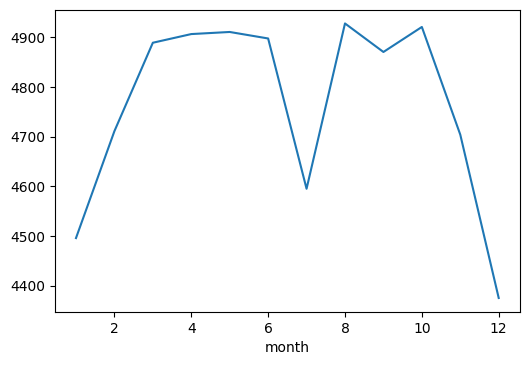

In [9]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

__Observations__: As seen above in the line graph, its clear that there is less traffic volume in the colder months (Nov-Feb) compared to the warmer months (Mar-Oct).

## Time Indicators (Day)

<ipython-input-10-3594305bb2cd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



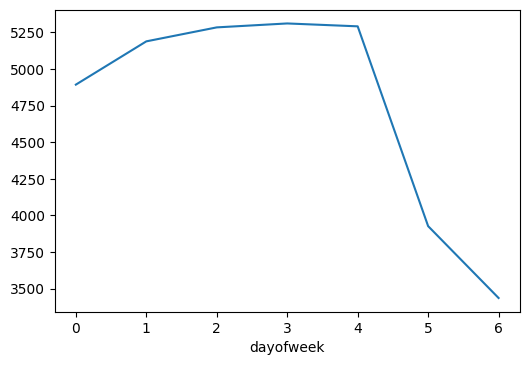

In [10]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

__Observations:__ It is clear from the line graph above that there is higher traffic volume during the weekdays/working days (Monday to Friday) compared to the weekend (Saturday to Sunday).

## Time Indicators (Hour)

<ipython-input-11-1fd00a6da7e2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



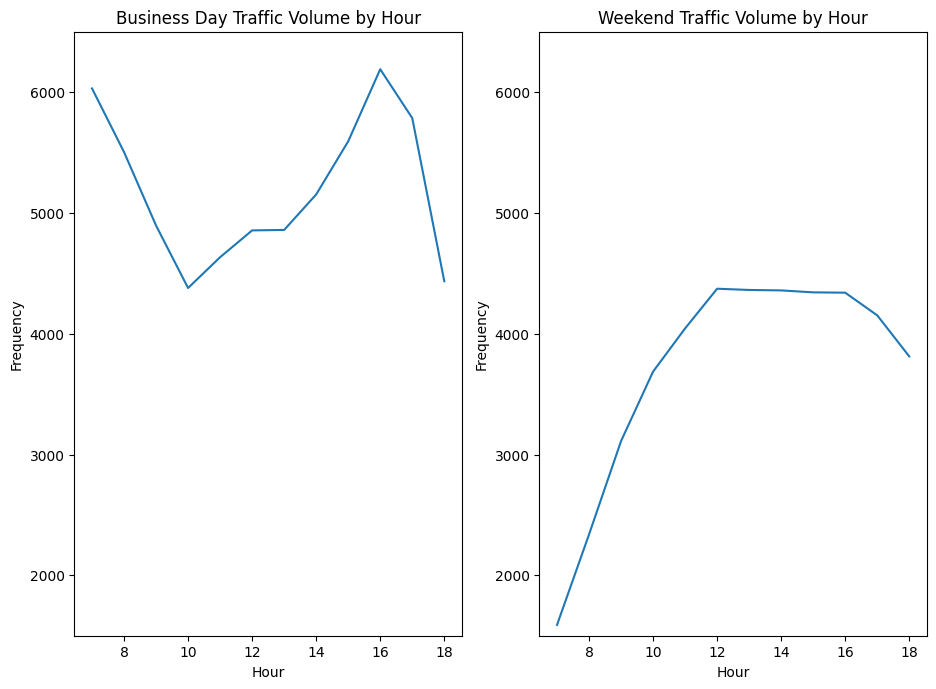

In [11]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11,8))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Day Traffic Volume by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.ylim(1500,6500)

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend Traffic Volume by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.ylim(1500,6500)
plt.show()

__Observations:__
- Traffic Volume is greater on Business Days
- On Buisness Days, the traffic volume is the greatest around (7am-9am) and (3pm-6pm), this is roughly when people go to work and when people leave work, the other hours traffic is relatively lower compared to those hours.
- During the Weekend, traffic volume is the greatest around (11am-6pm), and the other hours are relatively lower compared to those hours, but the volume is still lower compared to Business days. The peal traffic volume is when most people go out. 

__Summary:__ Traffic Volume is greatest during the daytime on buisness days and it is at it's lowest during the nighttime and on the weekends. Also traffic volume is lower in the colder months compared to the warmer months.

## Weather Indicators 
Finding the greatest correlation between the traffic volume and the weather columns. This is done to find the best possible indicator of weather on heavy traffic.

In [20]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

As seen above traffic volume and the temperature have the greatest correlation. So the resultis in the temp column will be used as our weather indicator.

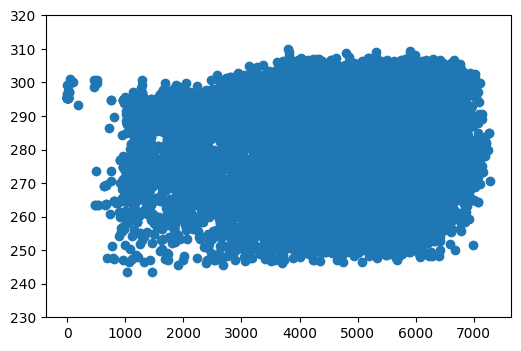

In [23]:
plt.scatter(daytime['traffic_volume'],daytime['temp'])
plt.ylim(230, 320)
plt.show()

## Weather Types
There are 2 columns that that are also weather indicators, 'weather_main' and 'weather_description'. 

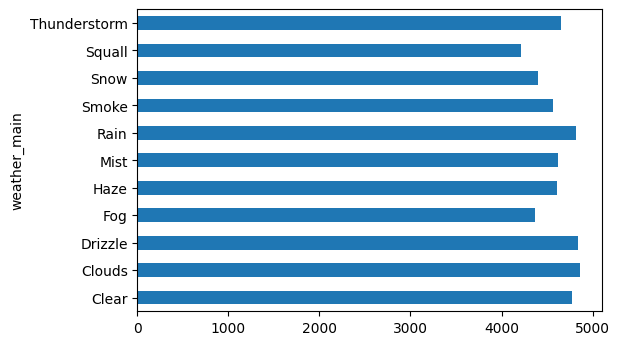

In [24]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

Most of these wather conditions roughly affect the traffic volume the same

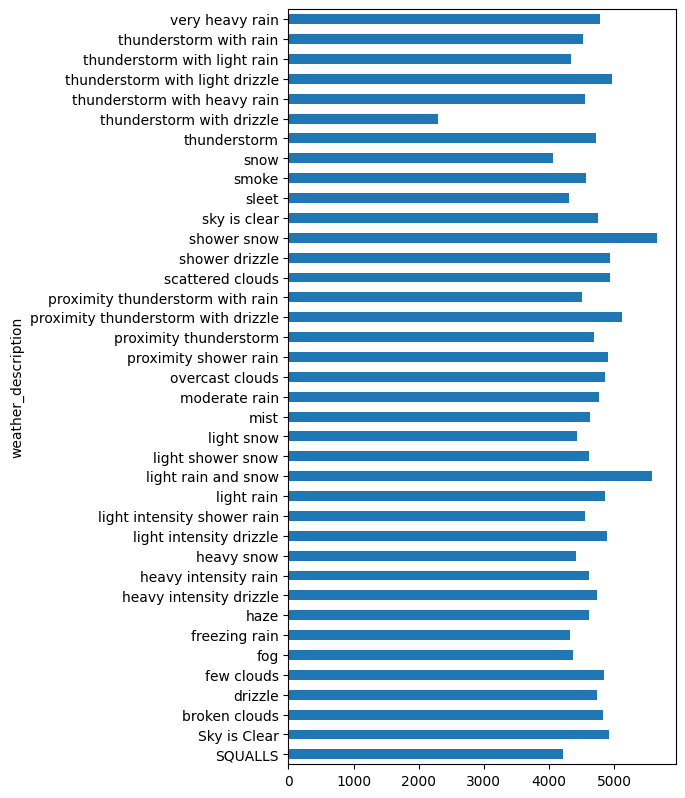

In [25]:
by_weather_description = daytime.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

There are 3 outlyers in this graph that exceed 5000. 
1. 'proximity thunderstorm with drizzle'
2. 'light rain and snow'
3. 'shower snow'
These 3 weather conditions affect the traffic vol